# 🔸Movie Recommendation System using KNN, Cosine Similarity, and SVM

-------------------------------------------------------------------------------------------------------------------------------

* **Objective:** Enhance user engagement and experience through personalized movie recommendations.
* **Dataset:** TMDB Dataset
* **Methodology:** Utilizes advanced machine learning, data analytics, and text processing techniques.
* **Text Processing:** Applies Count Vectorization and Cosine Similarity to convert textual data into numerical representations.
* **Result:** Facilitates tailored recommendations that surpass simple resemblances and genre boundaries.
* **Significance:** Demonstrates seamless integration of data analytics and machine learning, showcasing their real-world potential.

------------------------------------------------------------------------------------------------------------------------------------
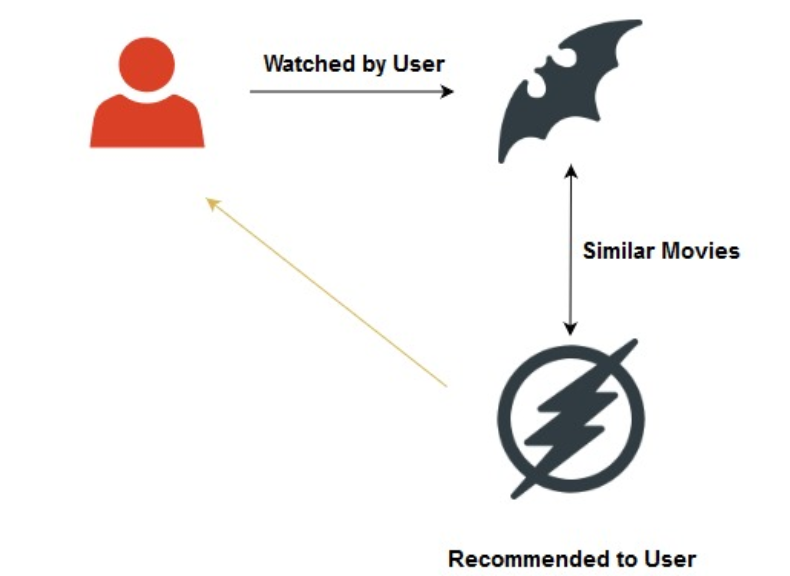


## 🔸Importing Libraries

In [52]:
import numpy as np 
import pandas as pd 


## 🔸 Importing Dataset



In [53]:
movies = pd.read_csv('./tmdb_5000_movies.csv')
credits = pd.read_csv('./tmdb_5000_credits.csv') 

In [54]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [55]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [56]:
movies.shape

(4803, 20)

In [57]:
credits.shape

(4803, 4)

## 🔸 Merging Imported Dataset

In [58]:
movies = movies.merge(credits,on='title')

In [59]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


**Observation :**
* The dataset containts a lot of redundant values and useless information that we don't need

* To prepare the data for computation and recommendation, we need to *clean the data*


##  🔸Pre-Processing the Data


In [60]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [61]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


###  Defining Cleaning Functions :

In [62]:
import ast

In [63]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

**Observation :**

1. **Input Processing**: Takes a string representing a list of dictionaries.

2. **Data Extraction**:
   - Uses `ast.literal_eval` to convert the string into a list of dictionaries.
   - Extracts and collects 'name' values from each dictionary.

3. **Output**:
   - Returns a list of extracted 'name' values.

In [64]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 

**Observation :**

1. **Input Parsing and Counter Initialization**:
   - Takes a string `text` as input, assumed to represent a list of dictionaries using `ast.literal_eval`.
   - Initializes a counter `counter` to keep track of the number of iterations.

2. **Data Extraction with Limit**:
   - Iterates over each dictionary in the list.
   - Extracts the value associated with the key 'name' and appends it to list `L`, but only for the first 3 iterations (controlled by `if counter < 3`).

3. **Output**:
   - Returns a list `L` containing the first three 'name' values from the dictionaries in the input list.

In [65]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 


**Observation :**


1. **Input Processing**:
   - Accepts a string `text` representing a list of dictionaries using `ast.literal_eval`.

2. **Filtering Based on Job Title**:
   - Iterates through each dictionary in the list.
   - Checks if the 'job' key in each dictionary has the value 'Director'.
   - If a dictionary has 'Director' as the job title, extracts and appends the associated 'name' value to the list `L`.

3. **Output**:
   - Returns a list `L` containing 'name' values from dictionaries where the 'job' is 'Director'.

In [66]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

**Observation :**

1. **Input Transformation**:
   - Takes a list `L` as input.

2. **Data Transformation**:
   - Iterates over each element in the list.
   - Removes spaces from each element using `i.replace(" ","")` and appends the modified element to a new list `L1`.

3. **Output**:
   - Returns a new list `L1` containing elements from `L` with spaces removed.

#### Dropping rows in dataset that contains NaN values

In [67]:
movies.dropna(inplace=True)

## 🔸 Removin Redundant Values

* **Applying Convert Function :**

In [68]:
movies['genres'] = movies['genres'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [69]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [70]:
movies['cast'] = movies['cast'].apply(convert)
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


* **Applying Fetch Director to <u>Extract</u> Director from Crew Coloumns :**

In [71]:
movies['crew'] = movies['crew'].apply(fetch_director)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


* **Removing Spaces and Collapsing Texts :**

In [72]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

## 🔸 Visualizing Cleaned Dataset

### Cleaned Data : 

In [73]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


**Observation :**

* The dataset is **cleaned**
* All the redundant data is removed
* The dataset is ready for visualization

### Importing Libraries for Visualization

In [74]:
import matplotlib.pyplot as plt
from collections import Counter
import random

## 🔸Histogram :

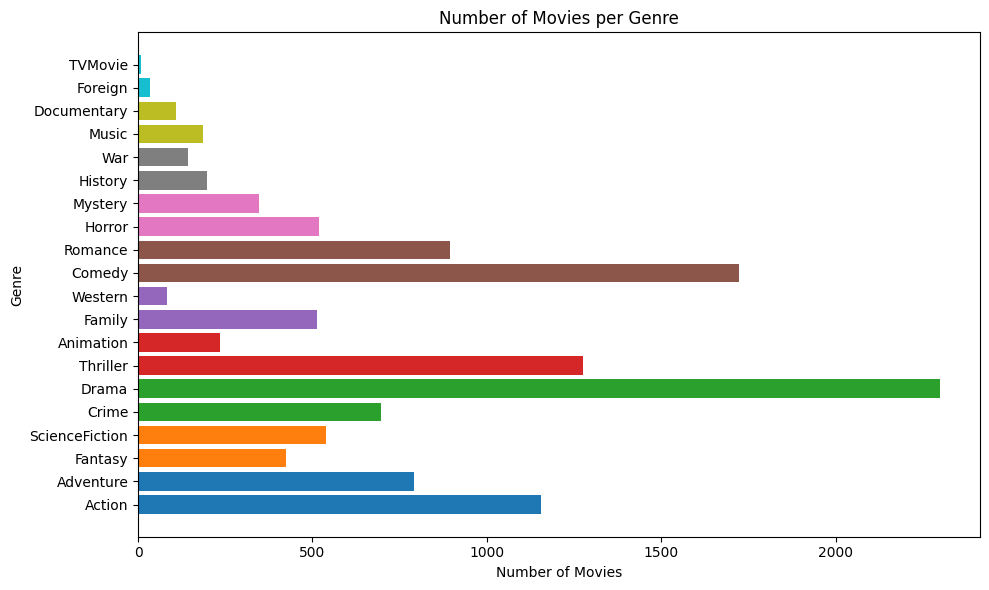

In [75]:
import matplotlib.pyplot as plt
from collections import Counter


# Data
x = movies["title"]
y = movies["genres"]

all_genres = [genre for genres in y for genre in genres]
genre_counts = Counter(all_genres)
unique_genres = list(genre_counts.keys())
counts = [genre_counts[genre] for genre in unique_genres]

# Create a colormap for the genres
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_genres)))

# Create evenly spaced y values for genres with added spacing
y_values = np.arange(len(unique_genres))

# Plot the histogram with different colors for each genre
plt.figure(figsize=(10, 6))
plt.barh(y_values, counts, color=colors)

# Set the labels and title
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Number of Movies per Genre')

# Set the y-axis ticks and labels
plt.yticks(y_values, unique_genres)

# Show the plot
plt.tight_layout()
plt.show()


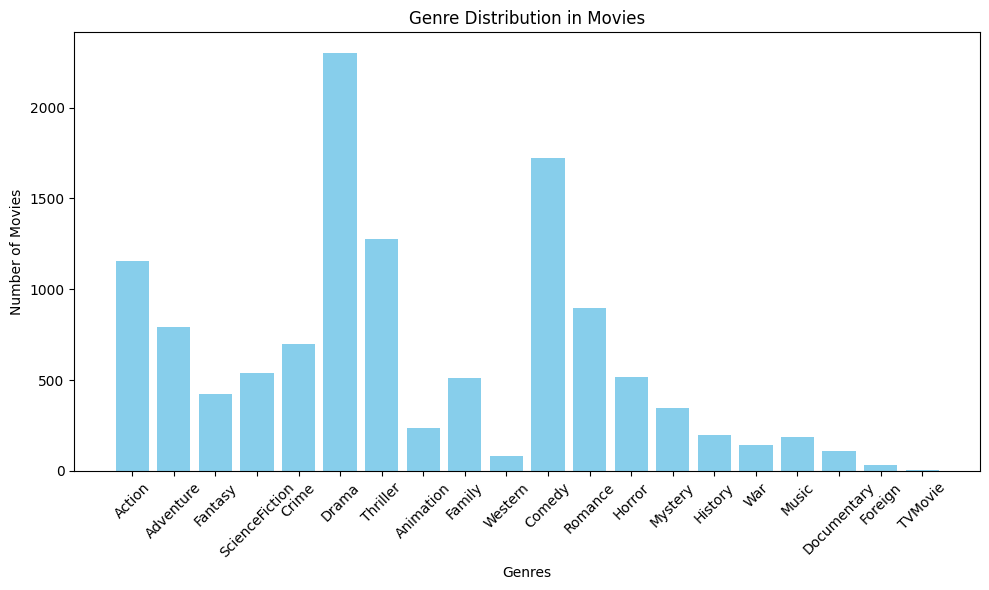

In [76]:
X = movies["title"]
Y = movies["genres"]

# Prepare data for bar plot
genre_counts = Counter(genre for genres in Y for genre in genres)
unique_genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(unique_genres, counts, color='skyblue')

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Genre Distribution in Movies')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Observation :**

* The Histogram shows different genres and the number of movies correspoint to each genre
* This Shows that <u>total no. of Genres are</u> <b>20</b> 

## 🔸Pie Chart

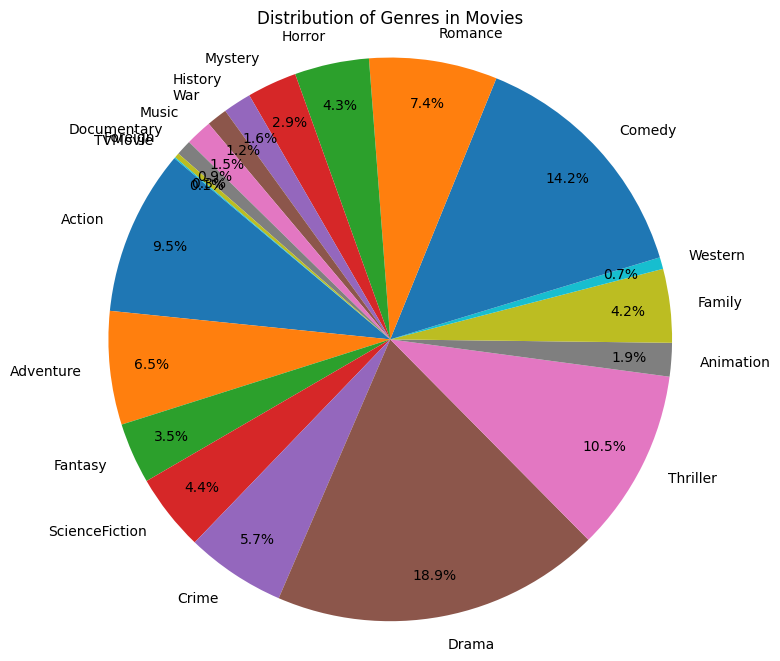

In [77]:
# X and Y values
X = movies["title"]
Y = movies["genres"]

# Prepare data for pie chart
genre_counts = Counter(genre for genres in Y for genre in genres)

# Plotting
plt.figure(figsize=(8, 8))

# Pie chart with percentage labels towards the edge
plt.pie(genre_counts.values(), labels=genre_counts.keys(), autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Genres in Movies')
plt.show()

**Observation :**

* Pie Chart shows you the **percentage** of movies each genre represents
* It also shows which genres make up for the largest % and smallest % in our dataset
* **Drama** occupies the largest area in pie chart while **TV Movies** occupies the smallest area in the pie chart


## 🔸Scatter Plot

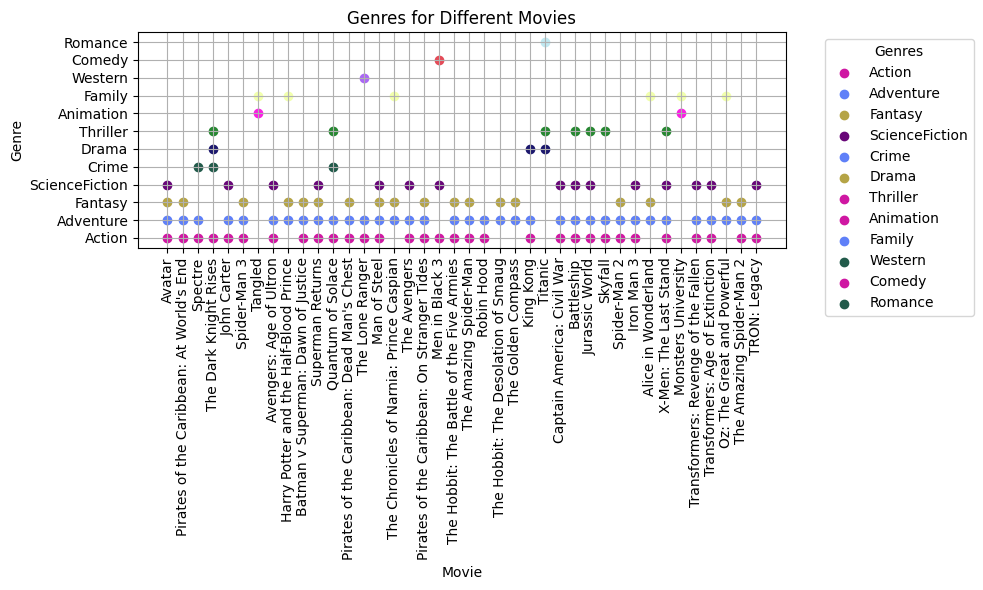

In [78]:
import random

mov = movies.head(40)

# Sample data
x = mov["title"]
y = mov["genres"]

# Assign random colors to each genre
genre_colors = {}

# Generate random color for each genre
for movie_genres in y:
    for genre in movie_genres:
        if genre not in genre_colors:
            genre_colors[genre] = '#' + ''.join([random.choice('0123456789ABCDEF') for i in range(6)])

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot each genre with a random color
for i in range(len(x)):
    movie = x[i]
    genres = y[i]
    for genre in genres:
        plt.scatter(movie, genre, color=genre_colors[genre])

# Create legend with unique genres outside the plot
legend_labels = {genre: color for genre, color in genre_colors.items()}
plt.legend(legend_labels, title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels and title
plt.xlabel('Movie')
plt.ylabel('Genre')
plt.title('Genres for Different Movies')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


**Observation :**

* Scatter Plot shows the relation between movie and multiple genres it has
* Tells us that one movie holds **more than one genre**

## 🔸Line / Trend Graph

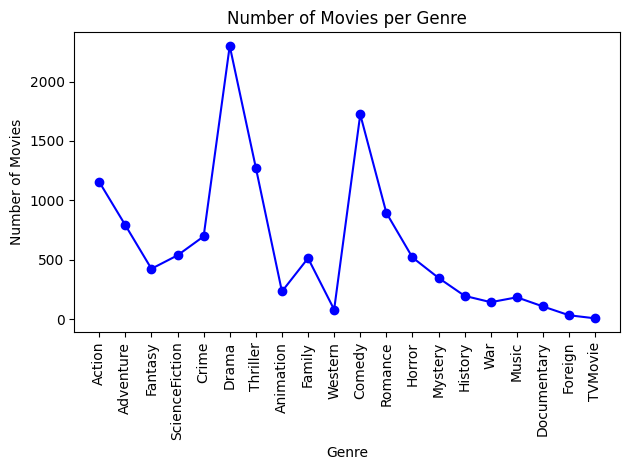

In [79]:

# Sample data
x = movies["title"]
y = movies["genres"]

# Flatten the list of genres
all_genres = [genre for genres in y for genre in genres]

# Count the occurrences of each genre
genre_counts = Counter(all_genres)

# Get unique genres and their counts
unique_genres = list(genre_counts.keys())
counts = [genre_counts[genre] for genre in unique_genres]

# Create a line graph
plt.plot(unique_genres, counts, marker='o', linestyle='-', color='b')

plt.ylabel('Number of Movies')
plt.xlabel('Genre')
plt.title('Number of Movies per Genre')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


**Observation :**

* Shows us the trend line between **genres** and the **number of movies**
* It also tells us that **Drama** has the highest no. of movies while **TV Movies** has the lowest

## 🔸Converting the Dataset for Model and Similarity Matrix Calculation

In [80]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

* **Merging all the relevant columns into one columns called "Tags" :**

In [81]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

* **Creating a new dataframe, containing only Id, title and tags. While dropping all other columns :**

In [82]:
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])

In [83]:
new["tags"]

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4804    [El, Mariachi, just, wants, to, play, his, gui...
4805    [A, newlywed, couple's, honeymoon, is, upended...
4806    ["Signed,, Sealed,, Delivered", introduces, a,...
4807    [When, ambitious, New, York, attorney, Sam, is...
4808    [Ever, since, the, second, grade, when, he, fi...
Name: tags, Length: 4806, dtype: object

* **Processing the "Tags" columns to make it better for computation**

In [84]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new['tags'] = new['tags'].apply(lambda x: x.lower())
new["title"] = new["title"].apply(lambda x: x.lower())

In [85]:
new.head()

,movie_id,title,tags
0,19995,avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,pirates of the caribbean: at world's end,"captain barbossa, long believed to be dead, ha..."
2,206647,spectre,a cryptic message from bond’s past sends him o...
3,49026,the dark knight rises,following the death of district attorney harve...
4,49529,john carter,"john carter is a war-weary, former military ca..."


**Observation :**

* All the columns are combined into one single colums called **tags**, which contains all the relevant information needed to make recommendations 

In [86]:
new["tags"]

0       in the 22nd century, a paraplegic marine is di...
1       captain barbossa, long believed to be dead, ha...
2       a cryptic message from bond’s past sends him o...
3       following the death of district attorney harve...
4       john carter is a war-weary, former military ca...
                              ...                        
4804    el mariachi just wants to play his guitar and ...
4805    a newlywed couple's honeymoon is upended by th...
4806    "signed, sealed, delivered" introduces a dedic...
4807    when ambitious new york attorney sam is sent t...
4808    ever since the second grade when he first saw ...
Name: tags, Length: 4806, dtype: object

**Observation :**

* Deeper look into the **tags** coolumn

# 🔸Model Calculation and Application

#### Importing Libraries :

In [87]:
# Vectorization Library :
from sklearn.feature_extraction.text import CountVectorizer

# Cosine Matrix library :
from sklearn.metrics.pairwise import cosine_similarity

# Knn and SVM Model Library
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder



## 🔸Vectorization of Dataset

* **Vectorizing "Tags" columns for similarity matrix**

In [88]:
cv = CountVectorizer(max_features=5000,stop_words='english')

In [89]:
vector = cv.fit_transform(new['tags']).toarray()

In [90]:
vector.shape

(4806, 5000)

* **Printing the Vectorized Matrix Details :**

In [91]:

# dimensions
print("No. of dimensions: ", vector.ndim)
 
# shape
print("Shape of array: ", vector.shape)
 
# size
print("Size of array: ", vector.size)
 
# type of elements
print("Array stores elements of type: ", vector.dtype)

print("\n\n", vector)

No. of dimensions:  2
Shape of array:  (4806, 5000)
Size of array:  24030000
Array stores elements of type:  int64


 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 🔸Cosine Matrix Calculation :

In [92]:
similarity = cosine_similarity(vector)

In [93]:
similarity.shape

(4806, 4806)

In [94]:
similarity

array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

**observation :**

* Similarity Matrix is shown above

* **Producing Heatmap for Similarity Matrix :**

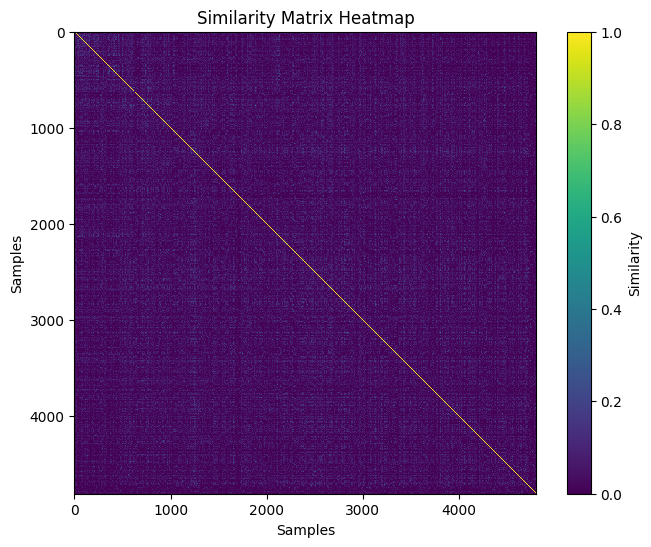

In [95]:
# Create a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(similarity, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Similarity')

# Add labels and title
plt.xlabel('Samples')
plt.ylabel('Samples')
plt.title('Similarity Matrix Heatmap')

plt.show()

**Observation :**

* The yellow line shows where the similarity is highest i.e **1**, while rest is **<1**

## 🔸Fitting Data into Models

### 🔹 KNN Model :

In [96]:
# Fit a KNN model on the similarity matrix
knn_model = NearestNeighbors(n_neighbors=6, metric='cosine', algorithm='brute', n_jobs=-1)
knn_model.fit(similarity)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=6)

**Observation :**

1. **Model Initialization**:
   - Initializes a K-Nearest Neighbors (KNN) model using `NearestNeighbors`.
   - Sets parameters such as the number of neighbors (`n_neighbors`), distance metric (`metric`), and computation method (`algorithm`).

2. **Model Training**:
   - Fits the KNN model to a similarity matrix represented by the variable `similarity`.
   - The model is trained to find the nearest neighbors for each data point based on the cosine similarity metric.

3. **Output**:
   - The KNN model (`knn_model`) is ready for making predictions or finding nearest neighbors based on the specified similarity matrix.

### 🔹SVM Model :

In [97]:
# Label encode the genres for SVM
label_encoder = LabelEncoder() 
movies['encoded_genres'] = label_encoder.fit_transform(movies['genres'].apply(lambda x: ' '.join(x)))

# Train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(vector, movies['encoded_genres'])

SVC(kernel='linear')

**Observation :**

1. **Label Encoding**:
   - Initializes a label encoder using `LabelEncoder`.
   - Transforms the 'genres' column in the 'movies' dataframe by converting genres into numerical labels using the label encoder.
   - Creates a new column 'encoded_genres' in the 'movies' dataframe to store the encoded genre labels.

2. **Model Initialization**:
   - Initializes a Support Vector Machine (SVM) model for classification using `SVC`.
   - Specifies a linear kernel for the SVM model using `kernel='linear'`.

3. **Model Training**:
   - Fits the SVM model to the feature vectors represented by the variable `vector`.
   - Uses the encoded genre labels from the 'movies' dataframe as the target variable for training.

**---------------------------------------------------------------------------------------------------------------------------**

## 🔸Defining Recommendation Functions :

In [98]:

def get_knn_recommendations(movie_title, k=6):
    index = new[new['title'] == movie_title].index[0]
    distances, indices = knn_model.kneighbors([similarity[index]], n_neighbors=k)
    return [new.iloc[i]['title'] for i in indices.flatten()][1:]

def get_svm_recommendations(movie_title):
    index = new[new['title'] == movie_title].index[0]
    query_vector = vector[index].reshape(1, -1)
    predicted_genre = svm_model.predict(query_vector)
    
    # Find movies with the predicted genre
    predicted_genre_movies = movies[movies['encoded_genres'] == predicted_genre[0]]
    recommendations = predicted_genre_movies['title'].values.tolist()
    return recommendations

def recommend(movie_title):
    # Collaborative Filtering (KNN) for nearest neighbors
    knn_recommendations = get_knn_recommendations(movie_title)
    
    # Content-Based Filtering using SVM genre prediction
    svm_recommendations = get_svm_recommendations(movie_title)
    
    # Combine recommendations from both models
    final_recommendations = knn_recommendations + svm_recommendations
    
    # Remove duplicates if any
    final_recommendations = list(set(final_recommendations))
    
    # Print the final recommendations
    print("Recommendations for", movie_title)
    for i, movie in enumerate(final_recommendations, start=1):
        print(f"{i}. {movie}")


**Observation :**

* **get_knn_recommendations** function estimates and outputs the values using **cosine similarity matrix** and **KNN model** to suggest the movies based on nearest distance

* **get_svm_recommenations** function uses **SVM model** to generate output

* The Final **recommend** function take both the output from **SVM model** , **KNN model** and **cosine similarity** matrix to generate final recommendation based on the output of previous 3 Algos

# 🔸Output :

In [103]:
while True:
    try:
        user_inp = input("Search for Movies: ")
        print("---------------------------------------\n\n")
        recommend(user_inp)
        print("\n\n")
    except IndexError as e:
        print("An error occurred: The Movie you searched for is not in our database. Please try again")
    except Exception as e:
        print(f"An error occurred: {e}")
    
    temp = input("Want to search more? (y/n) ")
    
    if temp.lower() != 'y':
        break

---------------------------------------


An error occurred: The list is empty. Please refine your search criteria.


# 🔸Accuracy Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [101]:

predicted_genres = svm_model.predict(vector)


actual_genres = movies['encoded_genres']


conf_matrix = confusion_matrix(actual_genres, predicted_genres)



### 🔹Confusion Matrix

In [ ]:
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[28  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]


### 🔹Classification Report

In [ ]:
print("\nClassification Report:")
print(classification_report(actual_genres, predicted_genres))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         3
   